In [106]:
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt

In [210]:
g = 2
chi = 3
# Setup the annihilation operators.
a_1 = np.array([[0, 0, 1, 0],
                [0, 0, 0, 1],
                [0, 0, 0, 0],
                [0, 0, 0, 0]], dtype=complex)
a_2 = np.array([[0, 1, 0, 0],
                [0, 0, 0, 0],
                [0, 0, 0, -1],
                [0, 0, 0, 0]], dtype=complex)
H_sq = chi * (np.exp(-0.2j) * a_1 @ a_2 + np.exp(0.2j) * a_2.conj().T @ a_1.conj().T)
H_hop = g * (a_1 @ a_2.conj().T + a_2 @ a_1.conj().T)
H = H_sq + H_hop
C_H = -1.0j * (np.kron(H, np.eye(4)) - np.kron(np.eye(4), H.conj()))

x = np.random.uniform(0, 1)
y = np.random.uniform(0, 1)
z = x * y
r = np.random.uniform(0, 1) * np.sqrt((x - z) * (y - z))
s = np.random.uniform(0, 1) * np.sqrt(z * (1 - x - y + z))
rho_0_mat = np.array([[1 - x - y + z, 0, 0, r],
                      [0, x - z, s, 0],
                      [0, s.conj(), y - z, 0],
                      [r.conj(), 0, 0, z]], dtype=complex)

# Setup the Lindbladian.
kappas = np.linspace(0, 5, 100)
times = np.linspace(0.005, 0.5, 10)
ineq_1 = []
ineq_2 = []
for t in times:
    ineq_1_t = []
    ineq_2_t = []
    for kappa in kappas:
        kappa_l = 1.0 * kappa
        kappa_g = 2.0 * kappa
        D_loss = kappa_l* (np.kron(a_1, a_1.conj()) + np.kron(a_2, a_2.conj())
                          - 0.5 * np.kron(a_1.conj().T @ a_1 + a_2.conj().T @ a_2, np.eye(4))
                          - 0.5 * np.kron(np.eye(4), a_1.conj().T @ a_1 + a_2.conj().T @ a_2))
        D_gain = kappa_g * (np.kron(a_1.conj().T, a_1.T) + np.kron(a_2.conj().T, a_2.T)
                          - 0.5 * np.kron(a_1 @ a_1.conj().T + a_2 @ a_2.conj().T, np.eye(4))
                          - 0.5 * np.kron(np.eye(4), a_1 @ a_1.conj().T + a_2 @ a_2.conj().T))
        L = C_H + D_loss + D_gain
        
        rho_0 = rho_0_mat.flatten(order="F")
        rho = scipy.linalg.expm(L * t) @ rho_0
        rho_mat = rho.reshape((4, 4), order="F")
        r = rho_mat[0, 3]
        s = rho_mat[1, 2]
        z = rho_mat[3, 3]
        x = rho_mat[1, 1] + z
        y = rho_mat[2, 2] + z
        ineq_1_t.append((np.abs(s)**2 - z * (1 - x - y + z)) / t)
        ineq_2_t.append((np.abs(r)**2 - (x - z) * (y - z)) / t)
    ineq_1.append(ineq_1_t)
    ineq_2.append(ineq_2_t)

Text(0, 0.5, '$|s|^2 - z(1 - x - y + z)$')

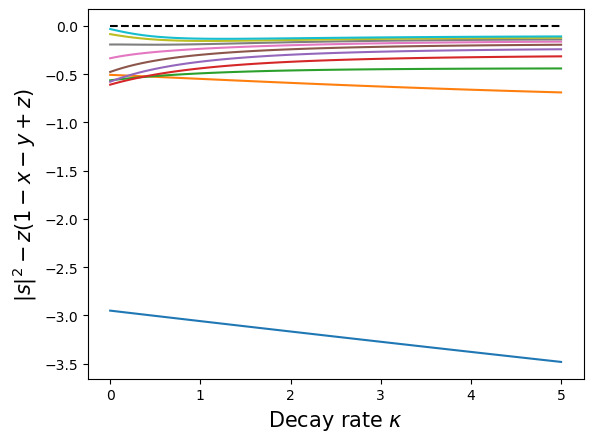

In [211]:
for t, ineq_1_t in zip(times, ineq_1):
    plt.plot(kappas, np.real(ineq_1_t))

plt.plot(kappas, np.zeros_like(kappas), '--k')
plt.xlabel("Decay rate $\kappa$", fontsize=15)
plt.ylabel("$|s|^2 - z(1 - x - y + z)$", fontsize=15)

Text(0, 0.5, '$|r|^2 - (x - z)(y - z)$')

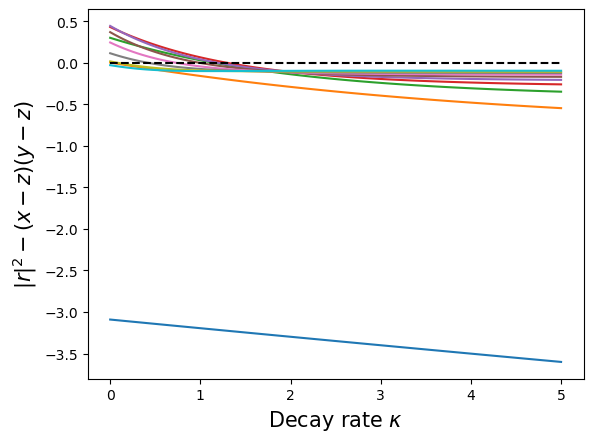

In [212]:
for t, ineq_2_t in zip(times, ineq_2):
    plt.plot(kappas, np.real(ineq_2_t))
plt.plot(kappas, np.zeros_like(kappas), '--k')
plt.xlabel("Decay rate $\kappa$", fontsize=15)
plt.ylabel("$|r|^2 - (x - z)(y - z)$", fontsize=15)

In [133]:
print()